<a href="https://colab.research.google.com/github/Permanganant/EHB-420E---Artificial-Neural-Networks-/blob/main/ANN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EHB 420E Artificial Neural Networks
#Weather Forecasting 

Mert Alperen Beser

#[Colab Link](https://colab.research.google.com/drive/1vss5zn2wsu9GQE-RNNCs-vM1_wNWCUYE?usp=sharing)

___

## 1 - Loading and Preprocessing the Data




###Loading Madrid Weather Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_set = pd.read_csv('/content/Madrid_Weather_1991_1995.csv')

In [ ]:
data_set

,Unnamed: 0,Year,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Sea_Level,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder,Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud
0,0,1991,1,1,5.3,9.6,0.0,-,-,86,0,3.4,2.4,13,-,1,0,0,0,0,0
1,1,1991,1,2,2.6,6.4,0.0,-,-,88,0,3.7,4.1,11.1,-,1,0,0,0,0,0
2,2,1991,1,3,2.3,5.2,-1.0,-,-,87,0,2.6,2.0,9.4,-,1,0,0,0,0,0
3,3,1991,1,4,3.9,10.0,0.0,-,-,63,0,8.0,4.4,25.9,-,1,0,0,0,0,0
4,4,1991,1,5,2.9,10.4,-3.0,-,-,69,0,10.5,5.2,18.3,-,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,1821,1995,12,27,9.7,11.0,6.5,1008.8,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0,0
1822,1822,1995,12,28,11.3,14.0,8.0,1012.8,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0,0
1823,1823,1995,12,29,9.0,10.2,7.6,1011.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0,0
1824,1824,1995,12,30,11.5,14.0,8.8,1001.6,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0,0


#### Plotting some of the data

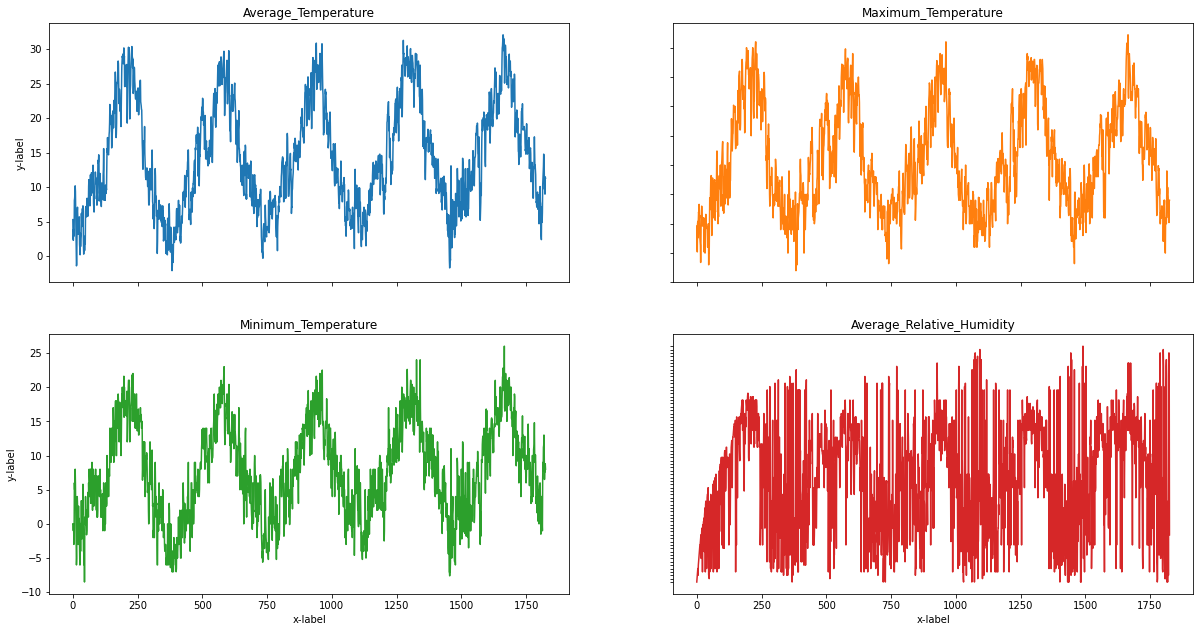

In [ ]:
fig, axs = plt.subplots(2, 2)

fig.set_size_inches(20.5, 10.5)
axs[0, 0].plot(data_set['Average_Temperature'])
axs[0, 0].set_title('Average_Temperature')
axs[0, 1].plot(data_set['Maximum_Temperature'], 'tab:orange')
axs[0, 1].set_title('Maximum_Temperature')
axs[1, 0].plot(data_set['Minimum_Temperature'], 'tab:green')
axs[1, 0].set_title('Minimum_Temperature')
axs[1, 1].plot(data_set['Average_Relative_Humidity'], 'tab:red')
axs[1, 1].set_title('Average_Relative_Humidity')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

### Dropping Out the Irrelevant Columns







In [ ]:
data_set = data_set.drop('Unnamed: 0',1)#Drop the index of data points
data_set = data_set.drop('Year',1)#Drop the year column
data_set = data_set.drop('Indicator_For_Occurrence_Of_Tornado_Funnel_Cloud',1)

In [ ]:
data_set

,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Sea_Level,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Maximum_Speed_Of_Wind,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder
0,1,1,5.3,9.6,0.0,-,-,86,0,3.4,2.4,13,-,1,0,0,0,0
1,1,2,2.6,6.4,0.0,-,-,88,0,3.7,4.1,11.1,-,1,0,0,0,0
2,1,3,2.3,5.2,-1.0,-,-,87,0,2.6,2.0,9.4,-,1,0,0,0,0
3,1,4,3.9,10.0,0.0,-,-,63,0,8.0,4.4,25.9,-,1,0,0,0,0
4,1,5,2.9,10.4,-3.0,-,-,69,0,10.5,5.2,18.3,-,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,12,27,9.7,11.0,6.5,1008.8,941.1,87,6.1,10.1,11.7,22.2,33.5,0,1,0,0,0
1822,12,28,11.3,14.0,8.0,1012.8,945,78,0,12.4,14.6,22.2,40.7,0,1,0,0,0
1823,12,29,9.0,10.2,7.6,1011.6,943.1,95,7.87,6.9,8.5,16.5,-,0,1,0,0,0
1824,12,30,11.5,14.0,8.8,1001.6,935.1,91,21.08,10.3,17.8,29.4,53.5,0,1,0,0,0


### Eliminating the Effect of "None" Data in Columns

#### To eliminate the effect of None **(' - ')** data in some columns. The **' - '**  character replaced with the mean value of the column. This is one of the well known procedure to eliminate missing data. This operation is made by the section below

This code below counts the ' - ' values on each column.

In [ ]:
Nan_dict = {}
for index, columns in data_set.iteritems():
  counter  = 0
  for item in columns:
    if item == '-':
      counter +=1
  Nan_dict[index] = counter 

In [ ]:
print("Number of (-) character in each class")
Nan_dict

Number of (-) character in each class


{'Average_Pressure_Sea_Level': 925,
 'Average_Pressure_Station_Level': 274,
 'Average_Relative_Humidity': 4,
 'Average_Temperature': 0,
 'Average_Visibility': 0,
 'Average_Wind_Speed': 0,
 'Day': 0,
 'Indicator_For_Occurrence_Of_Fog': 0,
 'Indicator_For_Occurrence_Of_Hail': 0,
 'Indicator_For_Occurrence_Of_Rain': 0,
 'Indicator_For_Occurrence_Of_Snow': 0,
 'Indicator_For_Occurrence_Of_Thunder': 0,
 'Maximum_Speed_Of_Wind': 1503,
 'Maximum_Sustained_Wind_Speed': 5,
 'Maximum_Temperature': 0,
 'Minimum_Temperature': 0,
 'Month': 0,
 'Total_Rainfall_Snowmelt': 2}

The code below checks the number of ' - ' characters whether it has huge distribution on the selected column. If the number of ' - ' characters is big enough(in our case thresh hold is chosen as %40), the selected column will be eliminated. If it is not big enough the ' - ' character will be replaced by the mean of the selected column. 

In [ ]:
length_of_ds = len(data_set)
for key in Nan_dict:
  items = Nan_dict[key]
  if items >= length_of_ds*(0.4):#Checking the threshold
    data_set = data_set.drop(key,1)
  elif items > 0 and items < length_of_ds*(0.4):
      
      copied_column_ = data_set[key].tolist()
      copied_column = copied_column_[:]
      copied_column = [x for x in copied_column if x != '-']
          
      print(copied_column)
      copied_column = list(np.float_(copied_column))
      mean = (np.mean(copied_column))#Calculating the mean for selected column
      print(mean)
      for item in data_set[key]: #Assigning the mean values
          counter = 0   
          if item == '-':
            counter +=1
            data_set[key] = mean

In [ ]:
data_set

,Month,Day,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Average_Pressure_Station_Level,Average_Relative_Humidity,Total_Rainfall_Snowmelt,Average_Visibility,Average_Wind_Speed,Maximum_Sustained_Wind_Speed,Indicator_For_Occurrence_Of_Fog,Indicator_For_Occurrence_Of_Rain,Indicator_For_Occurrence_Of_Snow,Indicator_For_Occurrence_Of_Hail,Indicator_For_Occurrence_Of_Thunder
0,1,1,5.3,9.6,0.0,950.897229,58.526894,1.075214,3.4,2.4,22.518177,1,0,0,0,0
1,1,2,2.6,6.4,0.0,950.897229,58.526894,1.075214,3.7,4.1,22.518177,1,0,0,0,0
2,1,3,2.3,5.2,-1.0,950.897229,58.526894,1.075214,2.6,2.0,22.518177,1,0,0,0,0
3,1,4,3.9,10.0,0.0,950.897229,58.526894,1.075214,8.0,4.4,22.518177,1,0,0,0,0
4,1,5,2.9,10.4,-3.0,950.897229,58.526894,1.075214,10.5,5.2,22.518177,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,12,27,9.7,11.0,6.5,950.897229,58.526894,1.075214,10.1,11.7,22.518177,0,1,0,0,0
1822,12,28,11.3,14.0,8.0,950.897229,58.526894,1.075214,12.4,14.6,22.518177,0,1,0,0,0
1823,12,29,9.0,10.2,7.6,950.897229,58.526894,1.075214,6.9,8.5,22.518177,0,1,0,0,0
1824,12,30,11.5,14.0,8.8,950.897229,58.526894,1.075214,10.3,17.8,22.518177,0,1,0,0,0


#### Finding the correlation between classes and investigating whether there are irrelevant classes

In [ ]:
# To find the correlation among
# the columns using pearson method
correlation = data_set.corr(method ='pearson')

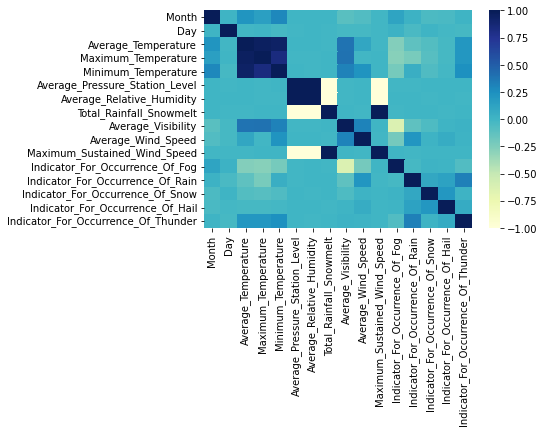

In [ ]:
import seaborn as sns
%matplotlib inline
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,
        cmap="YlGnBu")

#### Arranging the input and output arrays

In [ ]:
list_data=list(data_set)
class_names_len = len(list_data)
class_names_len

16

In [ ]:
y = data_set['Average_Temperature']
data_set = data_set.drop('Average_Temperature',1)
y = y.to_numpy()
y = y.astype(np.float)
X = data_set.iloc[:,0:class_names_len]
X = X.to_numpy()

## 2 - Training

#### Chosing Machine Learning Model

* In general, classification is about predicting distinguished labels from one another and regression is about predicting a continuous quantity output.
It is obvious that the wheater forecast estimation is a type of regression problem. However, our data has several data points and more complex and it is not possible to estimate future weather forecasts with linear regression. A more superior solution is needed.

* The given problem is a regression problem. The past 3 day data should be getting as input and the 4th day will be our input. The data should be fitted with regression. It is also a sequence problem. The result depends on the past 3 sequence day which is dependent on one another. For the sequence problems, Recursive Neural Network(RNN) structures are the best fit for time-series predictions as they can process sequence data. Long Short Term Memory structure, which is a type of improved RNN model, was chosen as the model. However, there are several LSTM structures depending on the problem. Many to one LSTM structure was chosen which is shown in the figure below. The individual LSTM cell also shown below.

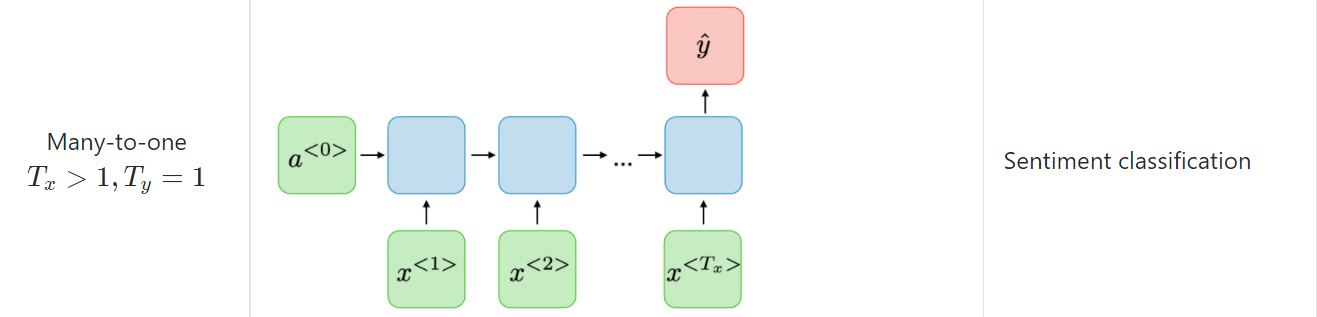

* The first three days will be the input (x1,x2,x3) and the 4th day will be the output (y). Thus, this process will walk on the whole training data set iteratively. This structure perfectly fit for the weather forecasting sequence problem.

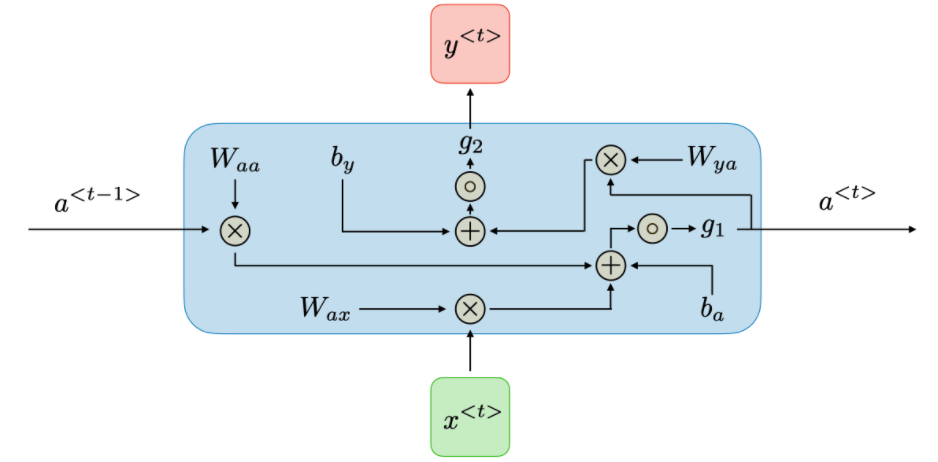

#### Splitting the data into test,validation and training

In [ ]:
from sklearn.model_selection import train_test_split

# 80% training 10% test 10%validation
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

#Splitting part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio,shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),shuffle=False)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense, Bidirectional

The data should be given as in packs of 3. The function below appends the arrays with 3 input 1 output rule because the data should be trained in that way.

In [ ]:
def sequence_generation(X,y,shape):
  y_ = []
  X_ = []

  for i in range(0,shape-3):
    X_dummy = []
    y_dummy = []
    for j in range(0,3):
      X_dummy.append(X[i+j,])
    y_dummy.append(y[i+3,])
    X_.append(X_dummy)
    y_.append(y_dummy)
  return X_,y_

Generation of packed data using ***sequence_generation*** function

In [ ]:
X_train,y_train = sequence_generation(X_train,y_train,X_train.shape[0])
X_val,y_val = sequence_generation(X_val,y_val,X_val.shape[0])
X_test,y_test = sequence_generation(X_test,y_test,X_test.shape[0])

In [ ]:
#Converting generated data into numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_val = np.array(X_val)
y_val = np.array(y_val)

Training, Test and Validation Shape

In [ ]:
print('Train Input Shape:',X_train.shape)
print('Train Input Shape:',y_train.shape)

print('Test Input Shape:',X_test.shape)
print('Test Input Shape:',y_test.shape)

print('Validation Input Shape:',X_val.shape)
print('Validation Input Shape:',y_val.shape)

Train Input Shape: (1457, 3, 15)
Train Input Shape: (1457, 1)
Test Input Shape: (180, 3, 15)
Test Input Shape: (180, 1)
Validation Input Shape: (180, 3, 15)
Validation Input Shape: (180, 1)


In [ ]:
#Reshaping the data for LSTM
X_train = np.reshape(X_train,(1457,15,3))
y_train = np.reshape(y_train,(1457))
X_val = np.reshape(X_test,(180,15,3))
y_val = np.reshape(y_test,(180,1))
X_test = np.reshape(X_test,(180,15,3))
y_test = np.reshape(y_test,(180,1))

Defining the LSTM (Many to One) Regressor Model

In [ ]:
regressor = Sequential()
regressor.add(Bidirectional(LSTM(units=3, input_shape =((3,15)))))
regressor.add(Dense(units = 1,activation='linear'))#Activation was chosen as linear because the data is not scaled
regressor.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae','mse'])
history = regressor.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=500,batch_size=32)

Epoch 1/500
46/46 [==============================] - 5s 22ms/step - loss: 254.6872 - mae: 13.9006 - mse: 254.6872 - val_loss: 363.2636 - val_mae: 17.6262 - val_mse: 363.2636
Epoch 2/500
46/46 [==============================] - 0s 6ms/step - loss: 244.3253 - mae: 13.5286 - mse: 244.3253 - val_loss: 352.2496 - val_mae: 17.3037 - val_mse: 352.2496
Epoch 3/500
46/46 [==============================] - 0s 6ms/step - loss: 237.2270 - mae: 13.2672 - mse: 237.2270 - val_loss: 343.1104 - val_mae: 17.0332 - val_mse: 343.1104
Epoch 4/500
46/46 [==============================] - 0s 6ms/step - loss: 230.1268 - mae: 13.0043 - mse: 230.1268 - val_loss: 332.5479 - val_mae: 16.7108 - val_mse: 332.5479
Epoch 5/500
46/46 [==============================] - 0s 6ms/step - loss: 222.7781 - mae: 12.7233 - mse: 222.7781 - val_loss: 325.6062 - val_mae: 16.4991 - val_mse: 325.6062
Epoch 6/500
46/46 [==============================] - 0s 6ms/step - loss: 217.8289 - mae: 12.5345 - mse: 217.8289 - val_loss: 319.4236 

####Hyper parameter tuning

For the hyperparameter tunning, several learning rate values (0.1,0.01,0.001,0.0001) was tried. However, the default learning rate was the most successful among them. The learning rate tunning results were not printed because the epoch is too large and it takes lots of space for visualization. Epoch value was chosen as 500 where the loss function saturates. All optimizers were tried and adam optimizer was chosen which provides the best and fast result compared to other optimizers. The dropout layer was not added because there is no overfitting error as can be seen in the prediction section below. It is obvious that the LSTM model simplified and shortened the hyperparameter fine tunning process while choosing the best parameters. 

#### Prediction

Each estimation was made for the past 3 day interval. In other words it gets past 3 days and predict the 4th day.

In [ ]:
#Creating prediction data
predicted_temperature = regressor.predict(X_test)
predicted_temperature = np.reshape(predicted_temperature,(predicted_temperature.shape[0],predicted_temperature.shape[1]))

In [ ]:
y_ = y_test
pred = predicted_temperature

The mean squared and mean absolute errors were plotted for both validation and training sets. It can be seen that loss decreases per epoch and also validation loss smoothly follows the training loss, therefore **overfitting is not expected for our model**.

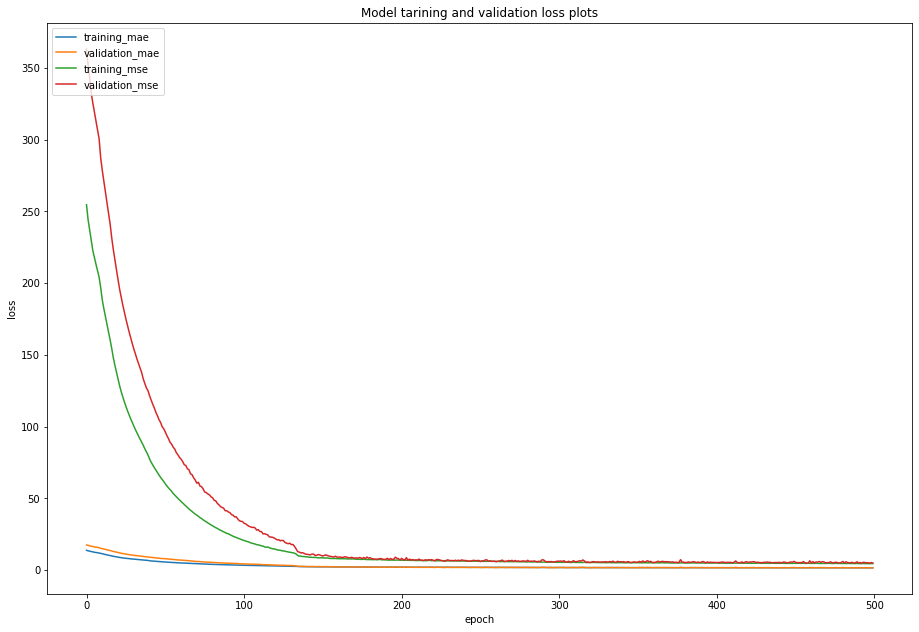

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])

plt.title('Model tarining and validation loss plots')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_mae', 'validation_mae','training_mse','validation_mse'], loc='upper left')
plt.show()

## 3 - Results and Conclusion

After the training, the model was tested. It can be seen that the predicted average temperatures almost follow the actual average temperature value in the resulting plot below. In the figure, there are also calculated mean square error and mean absolute error plots for each prediction.

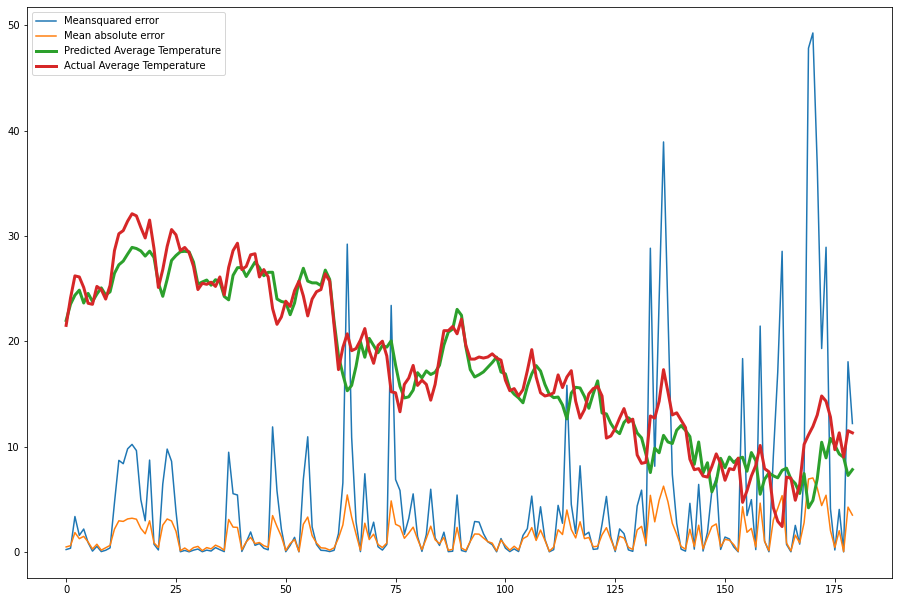

In [ ]:
import matplotlib.pyplot as plt
plt.figure(1)

mean_square_plot = np.square(np.subtract(pred,y_))
mean_absolute_plot = np.absolute(np.subtract(pred,y_))

fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)

plt.plot(mean_square_plot)
plt.plot(mean_absolute_plot)

plt.plot(predicted_temperature,linewidth=3.0)
plt.plot(y_test,linewidth=3.0)


plt.legend(['Meansquared error','Mean absolute error','Predicted Average Temperature','Actual Average Temperature'])

In [ ]:
acc = np.absolute(1- np.mean(np.divide(np.subtract(y_, pred),y_)))

Testing Mean Squared Error, Mean Absolute Error, Accuracy Percentage values were printed below. The LSTM model that is used is highly successful to estimate sequence weather forecast as can be seen from the 99.87 accuracy percentage rate.

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#Total Mean Squared and Absolute Error
print('Mean Squared Error: ',mean_squared_error(y_,predicted_temperature))
print('Mean Absolute Error: ',mean_absolute_error(y_,predicted_temperature))
print('Accuracy Percentage: ', acc*100)

Mean Squared Error:  4.99003854395312
Mean Absolute Error:  1.6706620062722102
Accuracy Percentage:  99.87479765208406
